<a href="https://colab.research.google.com/github/anariver/data205/blob/main/capstone_5_2_21_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

####**Table of Contents**
#### 1.  Data Ingestion & Wrangling 
> ##### 1a. County Public Wifi
> ##### 1b. Public Schools Dataset
> ##### 1c. Xfinity Wifi Locations
#### 2. Exploratory Data Analysis 
>##### 2a. County Public Wifi
>##### 2b. Public Schools
>##### 2c. Xfinity Wifi Locations
#### 3. Mapping
#### 4. Statistical Analysis
#### 5. Conclusion

## 1.  Data Ingestion & Wrangling

In [1]:
# Loading packages
import pandas as pd
import numpy as np

### 1a. County Wifi Locations dataset


In [190]:
# reading the csv files for county government wifi locations
df_county = pd.read_csv('og_county_wifi.csv')

In [191]:
# viewing the head of the dataframe
df_county.head()

,Agency,Department,Name,Address,Location
0,MCG,DPL,White Oak Library,"11701 New Hampshire Avenue, Silver Spring, MD ...",NaN
1,MCG,RSC,Sidney Kramer Upcounty Service ctr.,"12900 Middlebrook Road, Germantown MD",POINT (-77.267914 39.179332)
2,MCG,DTS,L3 Helpdesk & Office,"7361 Calhoun Plaza, Rockville, MD 20850",NaN
3,MCG,CAO/CEX/CC/Courts,OIG/ERP Office,"51 Monroe Street, Rockville, MD 20850",POINT (-90.409668 40.720439)
4,MCG,FRS,F&RS,"19801 Bealsville Road, Bealsville, MD 20839",NaN


In [192]:
# viewing the unique departments that the data contains
df_county.Department.unique()

array(['DPL', 'RSC', 'DTS', 'CAO/CEX/CC/Courts', 'FRS', 'REC', 'DOT',
       'DGS', 'HHS', 'BOE', 'DED/DEP', 'DOCR', 'MCPD', 'DLC',
       'PIO/PublicSafety', 'Warehouse', 'DHS', 'DPS'], dtype=object)

In [193]:
# Looking at how many are missing
# it is an issue that there is missing data because that will affect in plotting the points
df_county.Location.isnull().sum() 

34

In [194]:
# fixing the way that the "points" are in the dataframe
# socrata POINT datatypes list their coordinates as "longitude,latitude"
df_county[["Longitude", "Latitude"]] = df_county["Location"].str.replace("POINT \(","").str.replace("\)","").str.split(" ", expand=True)
print(df_county)

    Agency         Department  ...    Longitude   Latitude
0      MCG                DPL  ...          NaN        NaN
1      MCG                RSC  ...   -77.267914  39.179332
2      MCG                DTS  ...          NaN        NaN
3      MCG  CAO/CEX/CC/Courts  ...   -90.409668  40.720439
4      MCG                FRS  ...          NaN        NaN
..     ...                ...  ...          ...        ...
173    MCG                DGS  ...  -121.500155  38.549099
174    MCG                HHS  ...   -77.177593  39.102672
175    MCG                FRS  ...   -77.053153  39.042763
176    MCG                DOT  ...          NaN        NaN
177    MCG                RSC  ...   -77.095858  38.984796

[178 rows x 7 columns]


In [195]:
# using geopy to fill in the missing data.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="capstone")

In [196]:
# the NaN are floats
type(df_county['Location'][0])

float

In [197]:
# the values that are not missing in locations are strings
type(df_county['Location'][10])

str

In [198]:
# counting the number of times the geolocator fails
failed = 0 
# getting the value and index of the all the rows
for row_num, row in enumerate(df_county["Location"]):
  # if the value is NaN (float type) 
  if type(row) == float:
    # geocode the address at the same row
    location = geolocator.geocode(df_county["Address"][row_num])
    # if geocoded successfully
    if location is not None:
      df_county["Latitude"][row_num] = location.latitude
      df_county["Longitude"][row_num] = location.longitude
    else:
      failed += 1
      print(df_county["Address"][row_num])
print(failed)

7361 Calhoun Plaza,  Rockville, MD 20850
19801 Bealsville Road, Bealsville, MD 20839
8540 Anniversary Drive, Gaithersburg, MD 20877
8630 Fenton Street, 10th floor, Silver Spring, MD
1400 Spring St suite 305, Silver Spring, MD 20910
19300 Georgia Avenue, Brookville,  MD 20833
3300 Briggs Chaney Road, Silver Spring, MD 20904
14715 Good Hope Road, Silver Spring, MD 20905
13900 Old Columbia Pike, Silver Spring, MD 20904
14910 Old Comumbia Pike, Burtonsville, MD 20866
18905 Kingsview Drive, Germantown, MD, 20874
4407 Aspen Hill Road, Rockville, MD
14335 Cape May Road, Silver Spring, MD 20904
13


I then took this missing addresses, and was not able to find them all using GeoPy, and therefore decided to use an online platform called "Geocodio" to upload files with the address that are missing above.

After using Geogodio, I uploaded a CSV that has all the complete missing addresses

In [199]:
df_county_missing = pd.read_csv('county_wifi_complete.csv')
print(df_county_missing)

                                              Address   Latitude  Longitude
0            7361 Calhoun Plaza,  Rockville, MD 20850  39.108593 -77.151413
1         19801 Bealsville Road, Bealsville, MD 20839  39.180120 -77.411689
2      8540 Anniversary Drive, Gaithersburg, MD 20877  39.128437 -77.176747
3   8630 Fenton Street, 10th floor, Silver Spring, MD  38.997800 -77.028504
4   1400 Spring St suite 305, Silver Spring, MD 20910  38.998277 -77.033385
5         19300 Georgia Avenue, Brookville,  MD 20833  39.173028 -77.059161
6    3300 Briggs Chaney Road, Silver Spring, MD 20904  39.078652 -76.943824
7       14715 Good Hope Road, Silver Spring, MD 20905  39.096230 -76.984972
8    13900 Old Columbia Pike, Silver Spring, MD 20904  39.085080 -76.951411
9     14910 Old Comumbia Pike, Burtonsville, MD 20866  39.105644 -76.935861
10       18905 Kingsview Drive, Germantown, MD, 20874  39.165153 -77.285467
11                4407 Aspen Hill Road, Rockville, MD  39.079657 -77.088606
12       143

In [200]:
# Printing the indexes of the orginal missing data
print(df_county[df_county['Address']== '7361 Calhoun Plaza,  Rockville, MD 20850'].index.values)
print(df_county[df_county['Address']== '19801 Bealsville Road, Bealsville, MD 20839'].index.values)
print(df_county[df_county['Address']== '8540 Anniversary Drive, Gaithersburg, MD 20877'].index.values)
print(df_county[df_county['Address']== '8630 Fenton Street, 10th floor, Silver Spring, MD'].index.values)
print(df_county[df_county['Address']== '1400 Spring St suite 305, Silver Spring, MD 20910'].index.values)
print(df_county[df_county['Address']== '19300 Georgia Avenue, Brookville,  MD 20833'].index.values)
print(df_county[df_county['Address']== '3300 Briggs Chaney Road, Silver Spring, MD 20904'].index.values)
print(df_county[df_county['Address']== '14715 Good Hope Road, Silver Spring, MD 20905'].index.values)
print(df_county[df_county['Address']== '13900 Old Columbia Pike, Silver Spring, MD 20904'].index.values)
print(df_county[df_county['Address']== '14910 Old Comumbia Pike, Burtonsville, MD 20866'].index.values)
print(df_county[df_county['Address']== '18905 Kingsview Drive, Germantown, MD, 20874'].index.values)
print(df_county[df_county['Address']== '4407 Aspen Hill Road, Rockville, MD'].index.values)
print(df_county[df_county['Address']== '14335 Cape May Road, Silver Spring, MD 20904'].index.values)

[2]
[4]
[13]
[29]
[41]
[48]
[130]
[131]
[133]
[142]
[147]
[152]
[176]


In [201]:
# Replacing missing value 
df_county.loc[2, 'Latitude'] = 39.108593
df_county.loc[2, 'Longitude'] = -77.151413

df_county.loc[4, 'Latitude'] = 39.180120
df_county.loc[4, 'Longitude'] = -77.411689

df_county.loc[13, 'Latitude'] = 39.128437 
df_county.loc[13, 'Longitude'] = -77.176747

df_county.loc[29, 'Latitude'] = 38.997800 
df_county.loc[29, 'Longitude'] = -77.028504

df_county.loc[41, 'Latitude'] = 38.998277 
df_county.loc[41, 'Longitude'] = -77.033385

df_county.loc[48, 'Latitude'] = 39.173028 
df_county.loc[48, 'Longitude'] = -77.059161

df_county.loc[130, 'Latitude'] = 39.078652 
df_county.loc[130, 'Longitude'] = -76.943824

df_county.loc[131, 'Latitude'] = 39.096230 
df_county.loc[131,'Longitude'] = -76.984972

df_county.loc[133, 'Latitude'] = 39.085080 
df_county.loc[133, 'Longitude'] = -76.951411

df_county.loc[142, 'Latitude'] = 39.105644 
df_county.loc[142, 'Longitude'] = -76.935861

df_county.loc[147, 'Latitude'] = 39.165153 
df_county.loc[147, 'Longitude'] = -77.285467

df_county.loc[152, 'Latitude'] = 39.079657 
df_county.loc[152, 'Longitude'] = -77.088606

df_county.loc[176, 'Latitude'] = 39.090311 
df_county.loc[176, 'Longitude'] = -76.99669

df_county.loc[176, 'Latitude'] = 39.090311 
df_county.loc[176, 'Longitude'] = -76.99669

In [202]:
# Checking that the missing data was inserted correctly
df_county.loc[133] 

Agency                                                     MCG
Department                                                 FRS
Name                                                      F&RS
Address       13900 Old Columbia Pike, Silver Spring, MD 20904
Location                                                   NaN
Longitude                                             -76.9514
Latitude                                               39.0851
Name: 133, dtype: object

In [203]:
# Checking that there are no more null values
print(df_county.Latitude.isnull().sum())
print(df_county.Longitude.isnull().sum())

0
0


In [204]:
df_county[(df_county['Address'] == '401 Hungford Dr.')]

,Agency,Department,Name,Address,Location,Longitude,Latitude
107,MCG,HHS,HHS -401 Hungford,401 Hungford Dr.,POINT (-88.238807 42.044501),-88.238807,42.044501


In [205]:
df_county.to_excel("df_wifi_final.xlsx", sheet_name='county_wifi')  

In [206]:
df_county.dtypes

Agency        object
Department    object
Name          object
Address       object
Location      object
Longitude     object
Latitude      object
dtype: object

#### 1a.1. County Wifi Dataset Corrections

Through graphing coordinates provided by the original county wifi dataset in Tableau, I noticed that are some errors in the Longitude and Latitude in the OG dataset, and must make corrections in order to accurately map.

In [207]:
# Changing all the Longitude and Latiude to numeric 
df_county["Longitude"]         = pd.to_numeric(df_county["Longitude"])
df_county["Latitude"]         = pd.to_numeric(df_county["Latitude"])

In [208]:
# Identifying those addresses with the incorrect Longitude (less than -77.5) or (more than -77)
errors = df_county[df_county['Longitude'] < -77.5].index
errors = sorted(np.append(errors, df_county[df_county['Longitude'] > -77].index))
df_errors = df_county.iloc[errors]["Address"]

In [209]:
print(df_errors)

0      11701 New Hampshire Avenue, Silver Spring, MD ...
3                  51 Monroe Street, Rockville, MD 20850
6               8700 Piney Branch Rd., Silver Spring, MD
11                  27 Court House Square, Rockville, MD
12                     50 Maryland Avenue, Rockville, MD
14             14906 Old Columbia Pike, Burtonsville, MD
18                         9701 Main Street Damascus, MD
20                   1201 Jackson Rd., Silver Spring, MD
21                  29 Court House Square, Rockville, MD
22        18753 North Frederick Avenue, Gaithersburg, MD
25                     50 Maryland Avenue, Rockville, MD
27     14015 New Hampshire Avenue,Â Silver Spring, MD...
37                     4301 Willow Lane, Chevy Chase, MD
42          100 Maryland Avenue, 3rd Floor, Rockville MD
69         13216 New Hampshire Avenue, Silver Spring, MD
71       15620 Old Columbia Pike, Burtonsville, MD 20866
76                    1700 April Lane, Silver Spring, Md
80     11239 New Hampshire Aven

In [210]:
# Saving error rows to a csv file in order to use online coordinates finder
df_errors.to_csv('df_county_errors.csv')

Once again, I used the online platform Geocodio to find the missing coordinates. 

In [211]:
# Importing the corrected addresses
df_county_corrections = pd.read_csv('df_county_corrections.csv')
df_county_corrections.head()

,Unnamed: 0,Address,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,0,"11701 New Hampshire Avenue, Silver Spring, MD ...",39.048058,-76.992585,0.95,rooftop,11701.0,New Hampshire Ave,NaN,NaN,Silver Spring,MD,Montgomery County,20904.0,US,Montgomery
1,3,"51 Monroe Street, Rockville, MD 20850",39.083800,-77.148147,1.00,rooftop,51.0,Monroe St,NaN,NaN,Rockville,MD,Montgomery County,20850.0,US,Montgomery
2,6,"8700 Piney Branch Rd., Silver Spring, MD",38.999811,-76.998220,1.00,rooftop,8700.0,Piney Branch Rd,NaN,NaN,Silver Spring,MD,Montgomery County,20901.0,US,Montgomery
3,11,"27 Court House Square, Rockville, MD",39.004046,-77.101972,0.80,range_interpolation,27.0,N Ct,NaN,NaN,Bethesda,MD,Montgomery County,20814.0,US,TIGER/Line® dataset from the US Census Bureau
4,12,"50 Maryland Avenue, Rockville, MD",39.083283,-77.150677,1.00,rooftop,50.0,Maryland Ave,NaN,NaN,Rockville,MD,Montgomery County,20850.0,US,City of Rockville


In [212]:
# combinging the missing data with with corrected data for the specific rows
df_county_copy = df_county.copy()
for col_num, col in zip(errors, df_county_copy.iloc[errors]["Address"]):
  df_county_copy.loc[col_num, "Longitude"] = df_county_corrections[df_county_corrections["Address"] == col]["Longitude"].values[0]
  df_county_copy.loc[col_num, "Latitude"] = df_county_corrections[df_county_corrections["Address"] == col]["Latitude"].values[0]

In [213]:
# Viewing the corrected data
df_county_copy

,Agency,Department,Name,Address,Location,Longitude,Latitude
0,MCG,DPL,White Oak Library,"11701 New Hampshire Avenue, Silver Spring, MD ...",NaN,-76.992585,39.048058
1,MCG,RSC,Sidney Kramer Upcounty Service ctr.,"12900 Middlebrook Road, Germantown MD",POINT (-77.267914 39.179332),-77.267914,39.179332
2,MCG,DTS,L3 Helpdesk & Office,"7361 Calhoun Plaza, Rockville, MD 20850",NaN,-77.151413,39.108593
3,MCG,CAO/CEX/CC/Courts,OIG/ERP Office,"51 Monroe Street, Rockville, MD 20850",POINT (-90.409668 40.720439),-77.148147,39.083800
4,MCG,FRS,F&RS,"19801 Bealsville Road, Bealsville, MD 20839",NaN,-77.411689,39.180120
...,...,...,...,...,...,...,...
173,MCG,DGS,Swing Office Space,"1451 Seven Locks Road, Rockville, MD",POINT (-121.500155 38.549099),-77.162760,39.070994
174,MCG,HHS,HHS - 1301 Piccard Drive,"1301 Piccard Drive, Rockville, MD",POINT (-77.177593 39.102672),-77.177593,39.102672
175,MCG,FRS,Wheaton Resource Center,"11435 Grandview Ave, Wheaton, MD",POINT (-77.053153 39.042763),-77.053153,39.042763
176,MCG,DOT,Colesville Highway Service Depot,"14335 Cape May Road, Silver Spring, MD 20904",NaN,-76.996699,39.090311


In [214]:
# Saving it into a new file in order to plot in tableeau
df_county_copy.to_excel("df_county_corrections_final.xlsx", sheet_name='county_corrections')  

### 1b. Public Schools Dataset

In [65]:
# reading and viewing the head of the csv files for county government wifi locations
df_school = pd.read_csv('Public_Schools.csv')
df_school.head()

,CATEGORY,SCHOOL NAME,ADDRESS,CITY,ZIP CODE,PHONE,URL,LONGITUDE,LATITUDE,LOCATION
0,ELEMENTARY SCHOOLS,Beall ES,451 Beall Ave,Rockville,20850,301-279-8460,http://www.montgomeryschoolsmd.org/schools/bea...,-77.161758,39.087775,"451 Beall Ave\nRockville, MD 20850\n(39.087775..."
1,ELEMENTARY SCHOOLS,Clearspring ES,9930 Moyer Rd,Damascus,20872,301-253-7004,http://www.montgomeryschoolsmd.org/schools/cle...,-77.207301,39.265783,"9930 Moyer Rd\nDamascus, MD 20872\n(39.2657831..."
2,ELEMENTARY SCHOOLS,Sherwood ES,1401 Olney Sandy Spring Rd,Sandy Spring,20860,301-924-3195,http://www.montgomeryschoolsmd.org/schools/she...,-77.033116,39.149584,"1401 Olney Sandy Spring Rd\nSandy Spring, MD 2..."
3,ELEMENTARY SCHOOLS,Pine Crest ES,201 Woodmoor Dr,Silver Spring,20901,301-649-8066,http://www.montgomeryschoolsmd.org/schools/pin...,-77.005038,39.021311,"201 Woodmoor Dr\nSilver Spring, MD 20901\n(39...."
4,MIDDLE SCHOOLS,Earle B. Wood MS,14615 Bauer Dr,Rockville,20852,301-460-2150,http://www.montgomeryschoolsmd.org/schools/woodms,-77.107529,39.093295,"14615 Bauer Dr\nRockville, MD 20852\n(39.09329..."


In [66]:
# Change the column names, lower case and removing spaces
df_school.columns =['category', 'school_name', 'address', 'city', 'zip_code', 'phone','url','longitude','latitude','location']
df_school.head()

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location
0,ELEMENTARY SCHOOLS,Beall ES,451 Beall Ave,Rockville,20850,301-279-8460,http://www.montgomeryschoolsmd.org/schools/bea...,-77.161758,39.087775,"451 Beall Ave\nRockville, MD 20850\n(39.087775..."
1,ELEMENTARY SCHOOLS,Clearspring ES,9930 Moyer Rd,Damascus,20872,301-253-7004,http://www.montgomeryschoolsmd.org/schools/cle...,-77.207301,39.265783,"9930 Moyer Rd\nDamascus, MD 20872\n(39.2657831..."
2,ELEMENTARY SCHOOLS,Sherwood ES,1401 Olney Sandy Spring Rd,Sandy Spring,20860,301-924-3195,http://www.montgomeryschoolsmd.org/schools/she...,-77.033116,39.149584,"1401 Olney Sandy Spring Rd\nSandy Spring, MD 2..."
3,ELEMENTARY SCHOOLS,Pine Crest ES,201 Woodmoor Dr,Silver Spring,20901,301-649-8066,http://www.montgomeryschoolsmd.org/schools/pin...,-77.005038,39.021311,"201 Woodmoor Dr\nSilver Spring, MD 20901\n(39...."
4,MIDDLE SCHOOLS,Earle B. Wood MS,14615 Bauer Dr,Rockville,20852,301-460-2150,http://www.montgomeryschoolsmd.org/schools/woodms,-77.107529,39.093295,"14615 Bauer Dr\nRockville, MD 20852\n(39.09329..."


In [67]:
# checking that there is no null in longitude and latitde
df_school.longitude.isnull().sum()
df_school.latitude.isnull().sum()

0

In [68]:
df_school[df_school['school_name'].str.contains("Cannon")]

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location
14,ELEMENTARY SCHOOLS,Cannon Road ES (at Fairland Center),13313 Old Columbia Pike,Silver Spring,20904,301-989-5662,http://www.montgomeryschoolsmd.org/schools/can...,-76.957893,39.074604,"13313 Old Columbia Pike\nSilver Spring, MD 209..."
73,ELEMENTARY SCHOOLS,Cannon Road ES (Construction),901 Cannon Rd,Silver Spring,20904,301-989-5662,http://www.montgomeryschoolsmd.org/schools/can...,-76.994173,39.068767,"901 Cannon Rd\nSilver Spring, MD 20904\n(39.06..."


In [69]:
indexNames = df_school[(df_school['school_name'] == 'Beverly Farms ES (Construction)') | 
                 (df_school['school_name'] == 'Garrett Park ES (Construction)')  |
                 (df_school['school_name'] == 'Cannon Road ES (Construction)')   |
                 (df_school['school_name'] == 'Broad Acres Elementary School')                  |
                 (df_school['school_name'] == 'Downcounty Consortium Elementary School (2012)') |
                 (df_school['school_name'] == 'Seven Locks ES (Construction)')   |
                 (df_school['school_name'] == 'Downcounty Consortium ES (2012)')   |
                 (df_school['school_name'] == 'Herbert Hoover MS (Construction)')].index
indexNames 

Int64Index([43, 62, 73, 103, 144, 171], dtype='int64')

In [70]:
df_school.drop(indexNames , inplace=True)

In [71]:
# changing index cols with rename()
df_school['school_name'] = df_school['school_name'].str.replace('ES', 'Elementary School')
df_school['school_name'] = df_school['school_name'].str.replace('MS', 'Middle School')
df_school['school_name'] = df_school['school_name'].str.replace('HS', 'High School')
df_school['school_name'] = df_school['school_name'].str.replace('.', '')
df_school['school_name'] = df_school['school_name'].str.replace('Capt','Captain')
df_school['school_name'] = df_school['school_name'].str.replace('Martin Luther King','Martin Luther King Jr')
df_school['school_name'] = df_school['school_name'].str.replace('School ', 'School')
df_school['school_name'] = df_school['school_name'].str.replace('\(\w.*\)', '', regex=True)

In [72]:
df_school[df_school['school_name'].str.contains("Cannon")]

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location
14,ELEMENTARY SCHOOLS,Cannon Road Elementary School,13313 Old Columbia Pike,Silver Spring,20904,301-989-5662,http://www.montgomeryschoolsmd.org/schools/can...,-76.957893,39.074604,"13313 Old Columbia Pike\nSilver Spring, MD 209..."


In [73]:
df_school.head()

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location
0,ELEMENTARY SCHOOLS,Beall Elementary School,451 Beall Ave,Rockville,20850,301-279-8460,http://www.montgomeryschoolsmd.org/schools/bea...,-77.161758,39.087775,"451 Beall Ave\nRockville, MD 20850\n(39.087775..."
1,ELEMENTARY SCHOOLS,Clearspring Elementary School,9930 Moyer Rd,Damascus,20872,301-253-7004,http://www.montgomeryschoolsmd.org/schools/cle...,-77.207301,39.265783,"9930 Moyer Rd\nDamascus, MD 20872\n(39.2657831..."
2,ELEMENTARY SCHOOLS,Sherwood Elementary School,1401 Olney Sandy Spring Rd,Sandy Spring,20860,301-924-3195,http://www.montgomeryschoolsmd.org/schools/she...,-77.033116,39.149584,"1401 Olney Sandy Spring Rd\nSandy Spring, MD 2..."
3,ELEMENTARY SCHOOLS,Pine Crest Elementary School,201 Woodmoor Dr,Silver Spring,20901,301-649-8066,http://www.montgomeryschoolsmd.org/schools/pin...,-77.005038,39.021311,"201 Woodmoor Dr\nSilver Spring, MD 20901\n(39...."
4,MIDDLE SCHOOLS,Earle B Wood Middle School,14615 Bauer Dr,Rockville,20852,301-460-2150,http://www.montgomeryschoolsmd.org/schools/woodms,-77.107529,39.093295,"14615 Bauer Dr\nRockville, MD 20852\n(39.09329..."


In [74]:
df_school[df_school['school_name'].str.contains("Cabin")]

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location
21,MIDDLE SCHOOLS,Cabin John Middle School,10701 Gainsborough Rd,Potomac,20854,301-469-1150,http://www.montgomeryschoolsmd.org/schools/cab...,-77.172022,39.031578,"10701 Gainsborough Rd\nPotomac, MD 20854\n(39...."


In [75]:
len(df_school)

194

In [76]:
df_school = df_school.sort_values(by=['school_name'])

In [77]:
len(df_school)

194

In [78]:
df_school.head()

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location
17,MIDDLE SCHOOLS,A Mario Loiederman Middle School,12701 Goodhill Rd,Silver Spring,20906,301-929-2282,http://www.montgomeryschoolsmd.org/schools/loi...,-77.070835,39.065306,"12701 Goodhill Rd\nSilver Spring, MD 20906\n(3..."
141,HIGH SCHOOLS,Albert Einstein High School,11135 Newport Mill Rd,Kensington,20895,301-929-2200,http://www.montgomeryschoolsmd.org/schools/ein...,-77.067036,39.039616,"11135 Newport Mill Rd\nKensington, MD 20895\n(..."
111,ELEMENTARY SCHOOLS,Arcola Elementary School,1820 Franwall Ave,Silver Spring,20902,301-649-8590,http://www.montgomeryschoolsmd.org/schools/arc...,-77.039388,39.045559,"1820 Franwall Ave\nSilver Spring, MD 20902\n(3..."
8,MIDDLE SCHOOLS,Argyle Middle School,2400 Bel Pre Rd,Silver Spring,20906,301-460-2400,http://www.montgomeryschoolsmd.org/schools/arg...,-77.048924,39.089521,"2400 Bel Pre Rd\nSilver Spring, MD 20906\n(39...."
195,ELEMENTARY SCHOOLS,Ashburton Elementary School,6314 Lone Oak Dr,Bethesda,20817,301-571-6959,http://www.montgomeryschoolsmd.org/schools/ash...,-77.127721,39.019444,"6314 Lone Oak Dr\nBethesda, MD 20817\n(39.0194..."


### 1c. Scraped Schools Dataset

In [82]:
df_demo = pd.read_csv('mcps_demo.csv',sep=',')

In [84]:
df_demo.head()

,Unnamed: 0,Name,Total Enrollment,Free lunch eligible1,Reduced-price lunch eligible1,Directly certified2
0,0,A. Mario Loiederman Middle,999,424,124,127
1,1,Albert Einstein High,"1,818",492,153,145
2,2,Alternative Programs,126,58,2,40
3,3,Arcola Elementary,748,456,95,159
4,4,Argyle Middle,"1,024",444,130,131


In [85]:
len(df_demo)

209

In [86]:
df_demo.columns =['number', 'school_name', 'total_enrollment', 'free_lunch', 'reduced_lunch', 'directly_certified']
df_demo.head()

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified
0,0,A. Mario Loiederman Middle,999,424,124,127
1,1,Albert Einstein High,"1,818",492,153,145
2,2,Alternative Programs,126,58,2,40
3,3,Arcola Elementary,748,456,95,159
4,4,Argyle Middle,"1,024",444,130,131


In [87]:
df_demo[df_demo['school_name'].str.contains("Beverly")]

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified
15,15,Beverly Farms Elementary,585,24,10,13


In [88]:
df_demo['school_name'] = df_demo['school_name'].str.replace('.', '')
df_demo['school_name'] = df_demo['school_name'].str.replace(' Elementary', ' Elementary School')
df_demo['school_name'] = df_demo['school_name'].str.replace(' Middle', ' Middle School')
df_demo['school_name'] = df_demo['school_name'].str.replace(' High', ' High School')
df_demo['school_name'] = df_demo['school_name'].str.replace('DuFief', 'Dufief')
df_demo['school_name'] = df_demo['school_name'].str.replace('McAuliffe', 'Mcauliffe')
df_demo['school_name'] = df_demo['school_name'].str.replace('John H Poole', 'John Poole')
df_demo['school_name'] = df_demo['school_name'].str.replace('New Hampshire Estates Elem', 'New Hampshire Estates Elementary School')
df_demo['school_name'] = df_demo['school_name'].str.replace('School School', 'School')
df_demo['school_name'] = df_demo['school_name'].str.replace('School ', 'School')
df_demo['school_name'] = df_demo['school_name'].str.replace('William Tyler Page', 'William T Page')

df_demo['school_name'] = df_demo['school_name'].str.replace('JoAnn Leleck at ', '')

In [89]:
df_demo[df_demo['school_name'].str.contains("Beverly")]

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified
15,15,Beverly Farms Elementary School,585,24,10,13


In [90]:
indexNames2 = df_demo[(df_demo['school_name'] == 'Carl Sandburg Center')   |
                        (df_demo['school_name'] == 'John L Gildner Regional Inst for Children & Adol') |
                        (df_demo['school_name'] == 'Longview School') |
                        (df_demo['school_name'] == 'MCPS Transitions School') |
                        (df_demo['school_name'] == 'Bayard Rustin Elementary School') |
                        (df_demo['school_name'] == 'Alternative Programs') |
                        (df_demo['school_name'] == 'Silver Creek Middle School')   |                     
                        (df_demo['school_name'] == 'Snowden Farm Elementary School') |
                        (df_demo['school_name'] == 'Stephen Knolls School') |
                        (df_demo['school_name'] == 'PEP - Itinerant') |
                        (df_demo['school_name'] == 'Rock Terrace School') |
                        (df_demo['school_name'] == 'Flora M Singer Elementary School')   |
                        (df_demo['school_name'] == 'Hallie Wells Middle School')   | 
                        (df_demo['school_name'] == 'Thomas Edison High Schoolof Technology')   | 
                        (df_demo['school_name'] == 'Wilson Wims Elementary School')].index
df_demo.drop(indexNames2 , inplace=True)


In [91]:
df_demo['free_lunch']  = df_demo['free_lunch'].str.replace('–','0')
df_demo['reduced_lunch'] = df_demo['reduced_lunch'].str.replace('–','0')
df_demo['directly_certified'] = df_demo['directly_certified'].str.replace('–','0')

In [92]:
df_demo['free_lunch'] = df_demo['free_lunch'].str.replace('‡','0')
df_demo['reduced_lunch'] = df_demo['reduced_lunch'].str.replace('‡','0')
df_demo['directly_certified'] = df_demo['directly_certified'].str.replace('‡','0')

### 1d. School Combined Dataset

In [93]:
df_school_final = df_demo.merge(df_school, on='school_name', how='outer', copy = False)

In [94]:
df_school_final.head()

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified,category,address,city,zip_code,phone,url,longitude,latitude,location
0,0,A Mario Loiederman Middle School,999,424,124,127,MIDDLE SCHOOLS,12701 Goodhill Rd,Silver Spring,20906,301-929-2282,http://www.montgomeryschoolsmd.org/schools/loi...,-77.070835,39.065306,"12701 Goodhill Rd\nSilver Spring, MD 20906\n(3..."
1,1,Albert Einstein High School,"1,818",492,153,145,HIGH SCHOOLS,11135 Newport Mill Rd,Kensington,20895,301-929-2200,http://www.montgomeryschoolsmd.org/schools/ein...,-77.067036,39.039616,"11135 Newport Mill Rd\nKensington, MD 20895\n(..."
2,3,Arcola Elementary School,748,456,95,159,ELEMENTARY SCHOOLS,1820 Franwall Ave,Silver Spring,20902,301-649-8590,http://www.montgomeryschoolsmd.org/schools/arc...,-77.039388,39.045559,"1820 Franwall Ave\nSilver Spring, MD 20902\n(3..."
3,4,Argyle Middle School,"1,024",444,130,131,MIDDLE SCHOOLS,2400 Bel Pre Rd,Silver Spring,20906,301-460-2400,http://www.montgomeryschoolsmd.org/schools/arg...,-77.048924,39.089521,"2400 Bel Pre Rd\nSilver Spring, MD 20906\n(39...."
4,5,Ashburton Elementary School,922,76,24,43,ELEMENTARY SCHOOLS,6314 Lone Oak Dr,Bethesda,20817,301-571-6959,http://www.montgomeryschoolsmd.org/schools/ash...,-77.127721,39.019444,"6314 Lone Oak Dr\nBethesda, MD 20817\n(39.0194..."


In [95]:
df_school_final[(df_school_final['school_name'] == "Beverly Farms Elementary School ")]

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified,category,address,city,zip_code,phone,url,longitude,latitude,location


In [96]:
df_school_final = df_school_final.sort_values(by=['school_name'])

In [97]:
df_school_final.head()

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified,category,address,city,zip_code,phone,url,longitude,latitude,location
0,0,A Mario Loiederman Middle School,999,424,124,127,MIDDLE SCHOOLS,12701 Goodhill Rd,Silver Spring,20906,301-929-2282,http://www.montgomeryschoolsmd.org/schools/loi...,-77.070835,39.065306,"12701 Goodhill Rd\nSilver Spring, MD 20906\n(3..."
1,1,Albert Einstein High School,"1,818",492,153,145,HIGH SCHOOLS,11135 Newport Mill Rd,Kensington,20895,301-929-2200,http://www.montgomeryschoolsmd.org/schools/ein...,-77.067036,39.039616,"11135 Newport Mill Rd\nKensington, MD 20895\n(..."
2,3,Arcola Elementary School,748,456,95,159,ELEMENTARY SCHOOLS,1820 Franwall Ave,Silver Spring,20902,301-649-8590,http://www.montgomeryschoolsmd.org/schools/arc...,-77.039388,39.045559,"1820 Franwall Ave\nSilver Spring, MD 20902\n(3..."
3,4,Argyle Middle School,"1,024",444,130,131,MIDDLE SCHOOLS,2400 Bel Pre Rd,Silver Spring,20906,301-460-2400,http://www.montgomeryschoolsmd.org/schools/arg...,-77.048924,39.089521,"2400 Bel Pre Rd\nSilver Spring, MD 20906\n(39...."
4,5,Ashburton Elementary School,922,76,24,43,ELEMENTARY SCHOOLS,6314 Lone Oak Dr,Bethesda,20817,301-571-6959,http://www.montgomeryschoolsmd.org/schools/ash...,-77.127721,39.019444,"6314 Lone Oak Dr\nBethesda, MD 20817\n(39.0194..."


In [98]:
len(df_school_final)

194

In [99]:
df_school_final['free_lunch'].dtypes

dtype('O')

In [100]:
df_school_final["free_lunch"]         = pd.to_numeric(df_school_final["free_lunch"])
df_school_final['reduced_lunch']      = pd.to_numeric(df_school_final['reduced_lunch'])
df_school_final['directly_certified'] = pd.to_numeric(df_school_final['directly_certified'])

In [101]:
print(df_school_final['free_lunch'].dtypes)
print(df_school_final['reduced_lunch'].dtypes)
print(df_school_final['directly_certified'].dtypes)

int64
int64
int64


In [102]:
df_school_final['total_enrollment'].dtypes

dtype('O')

In [103]:
df_school_final['total_enrollment'] = df_school_final['total_enrollment'].str.replace(',', '')

In [104]:
df_school_final['total_enrollment']   = pd.to_numeric(df_school_final['total_enrollment'])

In [105]:
df_school_final[["FARMs"]] = df_school_final["free_lunch"] + df_school_final["reduced_lunch"]
df_school_final[["FARMs_percentage"]] =  df_school_final["FARMs"] / df_school_final["total_enrollment"] 
df_school_final[["FARMs_percentage"]] = df_school_final["FARMs_percentage"] * 100


In [106]:
df_school_final.head()

,number,school_name,total_enrollment,free_lunch,reduced_lunch,directly_certified,category,address,city,zip_code,phone,url,longitude,latitude,location,FARMs,FARMs_percentage
0,0,A Mario Loiederman Middle School,999,424,124,127,MIDDLE SCHOOLS,12701 Goodhill Rd,Silver Spring,20906,301-929-2282,http://www.montgomeryschoolsmd.org/schools/loi...,-77.070835,39.065306,"12701 Goodhill Rd\nSilver Spring, MD 20906\n(3...",548,54.854855
1,1,Albert Einstein High School,1818,492,153,145,HIGH SCHOOLS,11135 Newport Mill Rd,Kensington,20895,301-929-2200,http://www.montgomeryschoolsmd.org/schools/ein...,-77.067036,39.039616,"11135 Newport Mill Rd\nKensington, MD 20895\n(...",645,35.478548
2,3,Arcola Elementary School,748,456,95,159,ELEMENTARY SCHOOLS,1820 Franwall Ave,Silver Spring,20902,301-649-8590,http://www.montgomeryschoolsmd.org/schools/arc...,-77.039388,39.045559,"1820 Franwall Ave\nSilver Spring, MD 20902\n(3...",551,73.663102
3,4,Argyle Middle School,1024,444,130,131,MIDDLE SCHOOLS,2400 Bel Pre Rd,Silver Spring,20906,301-460-2400,http://www.montgomeryschoolsmd.org/schools/arg...,-77.048924,39.089521,"2400 Bel Pre Rd\nSilver Spring, MD 20906\n(39....",574,56.054688
4,5,Ashburton Elementary School,922,76,24,43,ELEMENTARY SCHOOLS,6314 Lone Oak Dr,Bethesda,20817,301-571-6959,http://www.montgomeryschoolsmd.org/schools/ash...,-77.127721,39.019444,"6314 Lone Oak Dr\nBethesda, MD 20817\n(39.0194...",100,10.845987


In [107]:
df_school_final['FARMs'].dtypes

dtype('int64')

In [108]:
df_school_final['total_enrollment'].dtypes

dtype('int64')

In [109]:
df_school_final.to_excel("schools_final_file.xlsx", sheet_name='Sheet_name_1')  

### 1e. Xfinity Wifi Locations Dataset


In [167]:
df_xfinity = pd.read_excel('df_xfinity_final.xlsx')

In [168]:
# viewing the xfinity df
df_xfinity.head()

,Full_Address,Latitude,Longitude,City,Zip
0,"19737 Frederick Rd, Germantown, Maryland 20876",39.179688,-77.236382,Germantown,20876
1,"8413 Ramsey Ave, Silver Spring, Maryland 20910",38.994217,-77.029010,Silver Spring,20910
2,"3502 Morningwood Dr, Olney, Maryland 20832",39.151327,-77.069516,Olney,20832
3,"9172 Brookville Rd, Silver Spring, Maryland 20910",39.006246,-77.049362,Silver Spring,20910
4,"2211 Greenery Ln, Silver Spring, Maryland 20906",39.062183,-77.048984,Silver Spring,20906


In [169]:
len(df_xfinity)

6076

In [170]:
print(df_xfinity[df_xfinity['City'].str.contains("Washington")])
print( df_xfinity[df_xfinity['City'].str.contains("Virfina")])

                                        Full_Address  ...    Zip
1394  205 Grove Rd, Washington Grove, Maryland 20880  ...  20880

[1 rows x 5 columns]
Empty DataFrame
Columns: [Full_Address, Latitude, Longitude, City, Zip]
Index: []


In [171]:
print(df_xfinity.Latitude.isnull().sum())
print(df_xfinity.Longitude.isnull().sum())

0
0


### 1f. Monster Combined Dataset


In order to graph both the MPCS schools and Xfinity/County wifi, I will create a monster dataset

#### 1f.1. Monster School

In [116]:
monster_school = df_school_final[['school_name','address','category','latitude','longitude']]
print(monster_school.head())
print(len(monster_school))

                        school_name  ...  longitude
0  A Mario Loiederman Middle School  ... -77.070835
1       Albert Einstein High School  ... -77.067036
2          Arcola Elementary School  ... -77.039388
3              Argyle Middle School  ... -77.048924
4       Ashburton Elementary School  ... -77.127721

[5 rows x 5 columns]
194


In [118]:
monster_school.columns = ['Name', 'Address', 'Category', 'Latitude', 'Longitude']
print(monster_school.head())


                               Name  ...  Longitude
0  A Mario Loiederman Middle School  ... -77.070835
1       Albert Einstein High School  ... -77.067036
2          Arcola Elementary School  ... -77.039388
3              Argyle Middle School  ... -77.048924
4       Ashburton Elementary School  ... -77.127721

[5 rows x 5 columns]


In [129]:
monster_school["Type"] = ""
monster_school["Type"] = 'School'
monster_school

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Address,Category,Latitude,Longitude,Type
0,A Mario Loiederman Middle School,12701 Goodhill Rd,MIDDLE SCHOOLS,39.065306,-77.070835,School
1,Albert Einstein High School,11135 Newport Mill Rd,HIGH SCHOOLS,39.039616,-77.067036,School
2,Arcola Elementary School,1820 Franwall Ave,ELEMENTARY SCHOOLS,39.045559,-77.039388,School
3,Argyle Middle School,2400 Bel Pre Rd,MIDDLE SCHOOLS,39.089521,-77.048924,School
4,Ashburton Elementary School,6314 Lone Oak Dr,ELEMENTARY SCHOOLS,39.019444,-77.127721,School
...,...,...,...,...,...,...
189,Winston Churchill High School,11300 Gainsborough Rd,HIGH SCHOOLS,39.044305,-77.173128,School
190,Wood Acres Elementary School,5800 Cromwell Dr,ELEMENTARY SCHOOLS,38.967587,-77.118672,School
191,Woodfield Elementary School,24200 Woodfield Rd,ELEMENTARY SCHOOLS,39.252783,-77.198281,School
192,Woodlin Elementary School,2101 Luzerne Ave,ELEMENTARY SCHOOLS,39.006537,-77.046772,School


####1f.2. County Monster

In [160]:
monster_county = df_county_copy[['Name','Department','Address','Latitude','Longitude']]
print(monster_county.head())
print(len(monster_county))

                                  Name         Department  ...   Latitude  Longitude
0                    White Oak Library                DPL  ...  39.048058 -76.992585
1  Sidney Kramer Upcounty Service ctr.                RSC  ...  39.179332 -77.267914
2                 L3 Helpdesk & Office                DTS  ...  39.108593 -77.151413
3                       OIG/ERP Office  CAO/CEX/CC/Courts  ...  39.083800 -77.148147
4                                 F&RS                FRS  ...  39.180120 -77.411689

[5 rows x 5 columns]
178


In [162]:
monster_county.columns = ['Name', 'Category', 'Address', 'Latitude', 'Longitude']
print(monster_county.head())

                                  Name           Category  ...   Latitude  Longitude
0                    White Oak Library                DPL  ...  39.048058 -76.992585
1  Sidney Kramer Upcounty Service ctr.                RSC  ...  39.179332 -77.267914
2                 L3 Helpdesk & Office                DTS  ...  39.108593 -77.151413
3                       OIG/ERP Office  CAO/CEX/CC/Courts  ...  39.083800 -77.148147
4                                 F&RS                FRS  ...  39.180120 -77.411689

[5 rows x 5 columns]


In [163]:
monster_county["Type"] = ""
monster_county["Type"] = 'County Wifi'
monster_county

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Category,Address,Latitude,Longitude,Type
0,White Oak Library,DPL,"11701 New Hampshire Avenue, Silver Spring, MD ...",39.048058,-76.992585,County Wifi
1,Sidney Kramer Upcounty Service ctr.,RSC,"12900 Middlebrook Road, Germantown MD",39.179332,-77.267914,County Wifi
2,L3 Helpdesk & Office,DTS,"7361 Calhoun Plaza, Rockville, MD 20850",39.108593,-77.151413,County Wifi
3,OIG/ERP Office,CAO/CEX/CC/Courts,"51 Monroe Street, Rockville, MD 20850",39.083800,-77.148147,County Wifi
4,F&RS,FRS,"19801 Bealsville Road, Bealsville, MD 20839",39.180120,-77.411689,County Wifi
...,...,...,...,...,...,...
173,Swing Office Space,DGS,"1451 Seven Locks Road, Rockville, MD",39.070994,-77.162760,County Wifi
174,HHS - 1301 Piccard Drive,HHS,"1301 Piccard Drive, Rockville, MD",39.102672,-77.177593,County Wifi
175,Wheaton Resource Center,FRS,"11435 Grandview Ave, Wheaton, MD",39.042763,-77.053153,County Wifi
176,Colesville Highway Service Depot,DOT,"14335 Cape May Road, Silver Spring, MD 20904",39.090311,-76.996699,County Wifi


#### 1f.3. Xfinity Monster

In [172]:
monster_xfinity = df_xfinity[['Full_Address','Latitude','Longitude']]
print(monster_xfinity.head())
print(len(monster_xfinity))

                                        Full_Address   Latitude  Longitude
0     19737 Frederick Rd, Germantown, Maryland 20876  39.179688 -77.236382
1     8413 Ramsey Ave, Silver Spring, Maryland 20910  38.994217 -77.029010
2         3502 Morningwood Dr, Olney, Maryland 20832  39.151327 -77.069516
3  9172 Brookville Rd, Silver Spring, Maryland 20910  39.006246 -77.049362
4    2211 Greenery Ln, Silver Spring, Maryland 20906  39.062183 -77.048984
6076


In [174]:
monster_xfinity.columns = ['Address', 'Latitude', 'Longitude']
print(monster_xfinity.head())

                                             Address   Latitude  Longitude
0     19737 Frederick Rd, Germantown, Maryland 20876  39.179688 -77.236382
1     8413 Ramsey Ave, Silver Spring, Maryland 20910  38.994217 -77.029010
2         3502 Morningwood Dr, Olney, Maryland 20832  39.151327 -77.069516
3  9172 Brookville Rd, Silver Spring, Maryland 20910  39.006246 -77.049362
4    2211 Greenery Ln, Silver Spring, Maryland 20906  39.062183 -77.048984


In [175]:
monster_xfinity["Type"] = ""
monster_xfinity["Type"] = 'Xfinity Wifi'
monster_xfinity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Address,Latitude,Longitude,Type
0,"19737 Frederick Rd, Germantown, Maryland 20876",39.179688,-77.236382,Xfinity Wifi
1,"8413 Ramsey Ave, Silver Spring, Maryland 20910",38.994217,-77.029010,Xfinity Wifi
2,"3502 Morningwood Dr, Olney, Maryland 20832",39.151327,-77.069516,Xfinity Wifi
3,"9172 Brookville Rd, Silver Spring, Maryland 20910",39.006246,-77.049362,Xfinity Wifi
4,"2211 Greenery Ln, Silver Spring, Maryland 20906",39.062183,-77.048984,Xfinity Wifi
...,...,...,...,...
6071,"8821 Brookville Rd, Silver Spring, Maryland 20910",39.000694,-77.054031,Xfinity Wifi
6072,"12623 Wisteria Dr, Germantown, Maryland 20874",39.172108,-77.261473,Xfinity Wifi
6073,"2025 E East West Hwy, Silver Spring, Maryland ...",39.003109,-77.029648,Xfinity Wifi
6074,"210 Lincoln Ave, Rockville, Maryland 20850",39.092136,-77.148363,Xfinity Wifi


In [177]:
monster_xfinity["Category"] = ""
monster_xfinity["Name"] = ""

monster_xfinity["Category"] = 'Xfinity'
monster_xfinity["Name"] = "Xfinity"

monster_xfinity

,Address,Latitude,Longitude,Type,Category,Name
0,"19737 Frederick Rd, Germantown, Maryland 20876",39.179688,-77.236382,Xfinity Wifi,Xfinity,Xfinity
1,"8413 Ramsey Ave, Silver Spring, Maryland 20910",38.994217,-77.029010,Xfinity Wifi,Xfinity,Xfinity
2,"3502 Morningwood Dr, Olney, Maryland 20832",39.151327,-77.069516,Xfinity Wifi,Xfinity,Xfinity
3,"9172 Brookville Rd, Silver Spring, Maryland 20910",39.006246,-77.049362,Xfinity Wifi,Xfinity,Xfinity
4,"2211 Greenery Ln, Silver Spring, Maryland 20906",39.062183,-77.048984,Xfinity Wifi,Xfinity,Xfinity
...,...,...,...,...,...,...
6071,"8821 Brookville Rd, Silver Spring, Maryland 20910",39.000694,-77.054031,Xfinity Wifi,Xfinity,Xfinity
6072,"12623 Wisteria Dr, Germantown, Maryland 20874",39.172108,-77.261473,Xfinity Wifi,Xfinity,Xfinity
6073,"2025 E East West Hwy, Silver Spring, Maryland ...",39.003109,-77.029648,Xfinity Wifi,Xfinity,Xfinity
6074,"210 Lincoln Ave, Rockville, Maryland 20850",39.092136,-77.148363,Xfinity Wifi,Xfinity,Xfinity


In [185]:
monster_2= pd.concat([monster_school,monster_county],ignore_index=True)
#df = pd.merge(merged_df, df3, on="column1")
monster_2.tail()

,Name,Address,Category,Latitude,Longitude,Type
367,Swing Office Space,"1451 Seven Locks Road, Rockville, MD",DGS,39.070994,-77.162760,County Wifi
368,HHS - 1301 Piccard Drive,"1301 Piccard Drive, Rockville, MD",HHS,39.102672,-77.177593,County Wifi
369,Wheaton Resource Center,"11435 Grandview Ave, Wheaton, MD",FRS,39.042763,-77.053153,County Wifi
370,Colesville Highway Service Depot,"14335 Cape May Road, Silver Spring, MD 20904",DOT,39.090311,-76.996699,County Wifi
371,Bethesda/Chevy Chase RSC,"4805 Edgemoor Lane, Bethesda, Md",RSC,38.984796,-77.095858,County Wifi


In [186]:
monster_final = pd.concat([monster_2,monster_xfinity],ignore_index=True)
print(monster_final)

                                  Name  ...          Type
0     A Mario Loiederman Middle School  ...        School
1          Albert Einstein High School  ...        School
2             Arcola Elementary School  ...        School
3                 Argyle Middle School  ...        School
4          Ashburton Elementary School  ...        School
...                                ...  ...           ...
6443                           Xfinity  ...  Xfinity Wifi
6444                           Xfinity  ...  Xfinity Wifi
6445                           Xfinity  ...  Xfinity Wifi
6446                           Xfinity  ...  Xfinity Wifi
6447                           Xfinity  ...  Xfinity Wifi

[6448 rows x 6 columns]


In [187]:
monster_final.to_excel("monster.xlsx", sheet_name='monster')  

## 2. Exploratory Data Analysis 

In [218]:
# import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

### 2a. County Government Wifi Locations

In [216]:
df_county_copy.describe()

,Longitude,Latitude
count,178.000000,178.000000
mean,-77.126760,39.087458
std,0.102685,0.087412
min,-77.444954,38.646975
25%,-77.186592,39.030827
50%,-77.136382,39.083283
75%,-77.061064,39.129984
max,-76.564690,39.557328


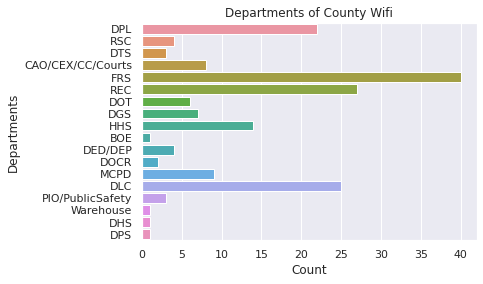

In [219]:
sns.set_theme(style="darkgrid")
sns.countplot(y='Department',data=df_county)
plt.xlabel('Count')
plt.ylabel('Departments')
plt.title('Departments of County Wifi')
plt.show()

### 2b. Public Schools

In [220]:
df_school_final.describe()

,number,total_enrollment,free_lunch,reduced_lunch,directly_certified,zip_code,longitude,latitude,FARMs,FARMs_percentage
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,103.778351,824.613402,218.943299,58.984536,93.907216,20871.371134,-77.128336,39.093005,277.927835,35.259114
std,60.413149,536.706904,180.475486,48.666623,71.905822,28.678608,0.102345,0.074559,226.552273,23.979643
min,0.000000,151.000000,0.000000,0.000000,3.000000,20814.000000,-77.418780,38.958471,0.000000,0.000000
25%,51.250000,500.250000,71.500000,23.250000,34.500000,20853.000000,-77.208897,39.034305,96.000000,14.406782
50%,103.500000,642.000000,182.500000,47.000000,81.000000,20876.000000,-77.121005,39.086207,233.500000,31.704007
75%,154.750000,893.000000,320.750000,84.750000,135.500000,20901.000000,-77.045557,39.147862,418.250000,53.854798
max,208.000000,3223.000000,810.000000,282.000000,347.000000,20912.000000,-76.936416,39.285506,1042.000000,87.448560


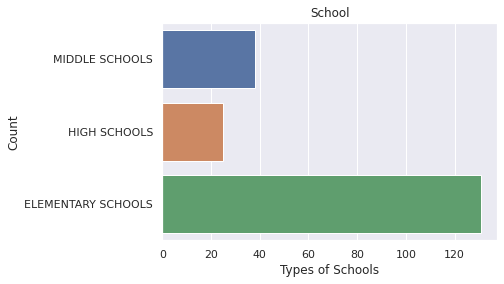

In [221]:
# graphing the number of categories of schools
sns.set_theme(style="darkgrid")
sns.countplot(y='category',data=df_school_final)
plt.xlabel('Types of Schools')
plt.ylabel('Count')
plt.title('School')
plt.show()

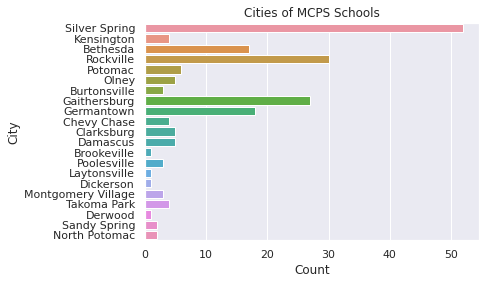

In [222]:
# Looking at which cities have the most schools
sns.set_theme(style="darkgrid")
sns.countplot(y='city',data=df_school_final)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Cities of MCPS Schools')
plt.show()

### 2c. School Combined Dataset

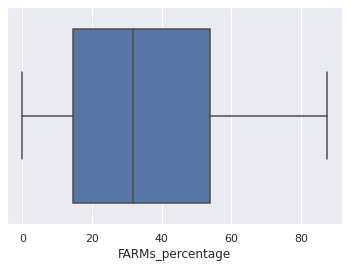

In [223]:
ax = sns.boxplot(x=df_school_final["FARMs_percentage"])

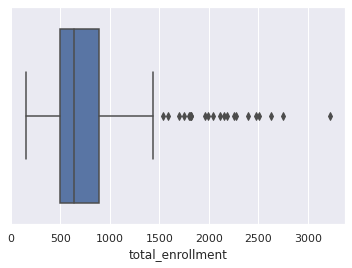

In [224]:
ax = sns.boxplot(x=df_school_final["total_enrollment"])

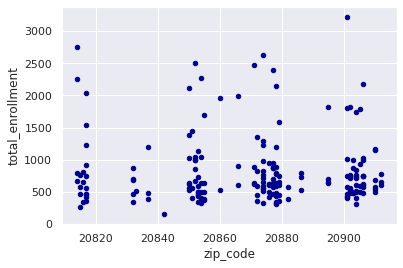

In [225]:
df_school_final.plot.scatter(x='zip_code',  y='total_enrollment', c='DarkBlue')

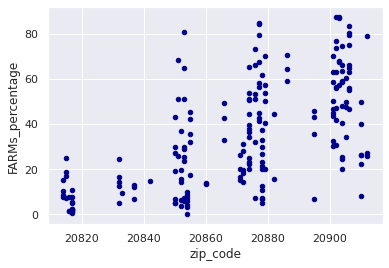

In [226]:
df_school_final.plot.scatter(x='zip_code',  y='FARMs_percentage', c='DarkBlue')

### 2c. Xfinity Hotstops Locations


In [155]:
df_xfinity.describe()

,Latitude,Longitude,Zip
count,6076.000000,6076.000000,6076.000000
mean,39.080833,-77.124087,20869.570935
std,0.069896,0.086998,34.800815
min,38.942893,-77.504380,20147.000000
25%,39.025535,-77.187154,20851.000000
50%,39.080196,-77.123087,20876.000000
75%,39.131864,-77.059596,20901.000000
max,39.315603,-76.916416,20912.000000


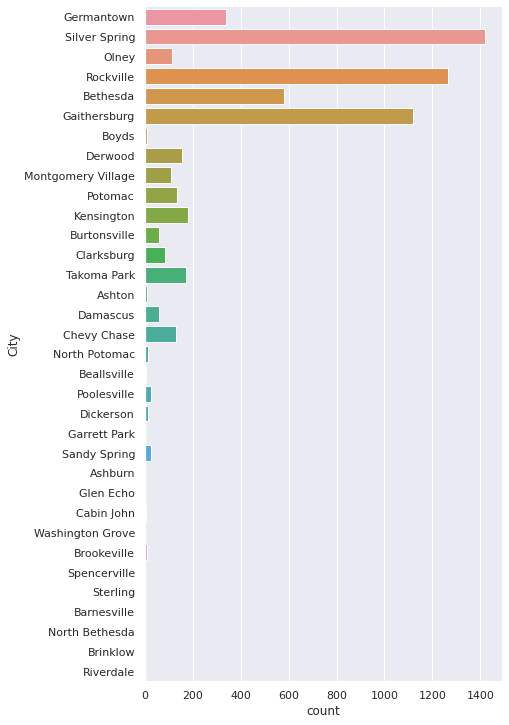

In [227]:
sns.catplot(y="City",
                data= df_xfinity, kind="count",
                height=10,aspect=.7)

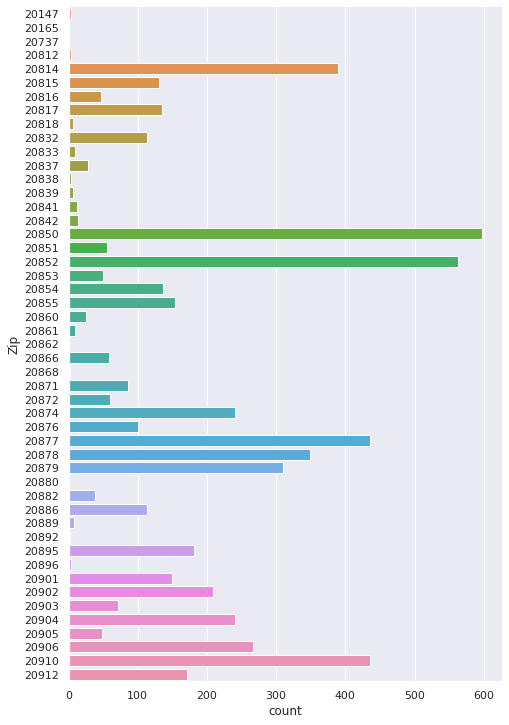

In [228]:
sns.catplot(y="Zip",
                data= df_xfinity, kind="count",
                height=10,aspect=.7)

## 3. Mapping

### 3a. Tableau Graphs


Tableau Graphs located here:

https://public.tableau.com/profile/ana3260#!/

	
1. MCPS Schools and FARMs Percentages
2. School Categories in MCPS
3. Xfinity Wifi Locations
4. County Government Wifi Locations
5. County Wifi and Xfinity Wifi
6. MCPS Schools and County Wifi
7. MCPS Schools and Xfinity Wifi


## 4. Statistical Analysis

In [247]:
# k-means clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sn

####4a. Clustering School Dataset

In [231]:
# Variable with the Longitude and Latitude
X=df_school_final.loc[:,['FARMs_percentage','latitude','longitude']]
X.head(10)

,FARMs_percentage,latitude,longitude
0,54.854855,39.065306,-77.070835
1,35.478548,39.039616,-77.067036
2,73.663102,39.045559,-77.039388
3,56.054688,39.089521,-77.048924
4,10.845987,39.019444,-77.127721
5,1.735358,38.974375,-77.138334
6,29.755179,39.087775,-77.161758
7,64.705882,39.081604,-77.054724
8,9.813084,39.032012,-77.168740
9,4.885057,39.178581,-77.066803


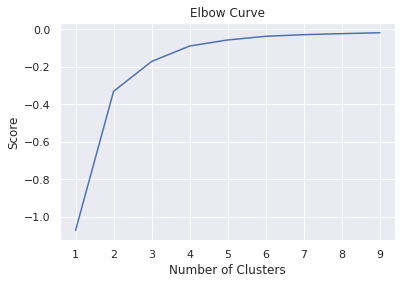

In [233]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_school_final[['latitude']]
X_axis = df_school_final[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [234]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,FARMs_percentage,latitude,longitude,cluster_label
0,54.854855,39.065306,-77.070835,0
1,35.478548,39.039616,-77.067036,0
2,73.663102,39.045559,-77.039388,0
3,56.054688,39.089521,-77.048924,0
4,10.845987,39.019444,-77.127721,2
5,1.735358,38.974375,-77.138334,2
6,29.755179,39.087775,-77.161758,2
7,64.705882,39.081604,-77.054724,0
8,9.813084,39.032012,-77.168740,2
9,4.885057,39.178581,-77.066803,0


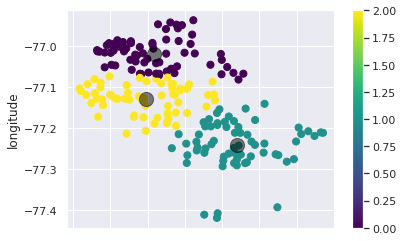

In [235]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### 4b. Clustering County Dataset


In [238]:
X=df_county.loc[:,['Department','Latitude','Longitude']]
X.head(10)

,Department,Latitude,Longitude
0,DPL,39.010175,-76.979224
1,RSC,39.179332,-77.267914
2,DTS,39.108593,-77.151413
3,CAO/CEX/CC/Courts,40.720439,-90.409668
4,FRS,39.180120,-77.411689
5,REC,39.277124,-77.215208
6,REC,39.000810,-76.998224
7,DOT,39.045098,-77.103056
8,FRS,38.986278,-77.077227
9,FRS,39.160549,-77.030146


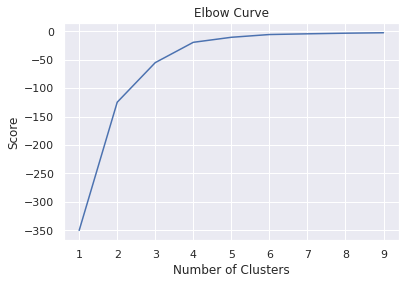

In [241]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_county[['Latitude']]
X_axis = df_county[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [242]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Department,Latitude,Longitude,cluster_label
0,DPL,39.010175,-76.979224,0
1,RSC,39.179332,-77.267914,0
2,DTS,39.108593,-77.151413,0
3,CAO/CEX/CC/Courts,40.720439,-90.409668,1
4,FRS,39.180120,-77.411689,0
5,REC,39.277124,-77.215208,0
6,REC,39.000810,-76.998224,0
7,DOT,39.045098,-77.103056,0
8,FRS,38.986278,-77.077227,0
9,FRS,39.160549,-77.030146,0


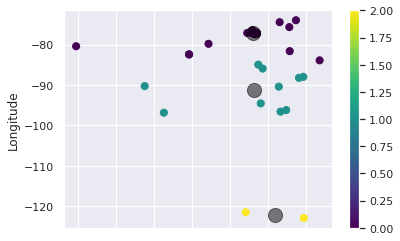

In [245]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### 4c. Clustering Monster Dataset

In [256]:
X=monster_final.loc[:,['Type','Latitude','Longitude']]
X.head(10)

,Type,Latitude,Longitude
0,School,39.065306,-77.070835
1,School,39.039616,-77.067036
2,School,39.045559,-77.039388
3,School,39.089521,-77.048924
4,School,39.019444,-77.127721
5,School,38.974375,-77.138334
6,School,39.087775,-77.161758
7,School,39.081604,-77.054724
8,School,39.032012,-77.168740
9,School,39.178581,-77.066803


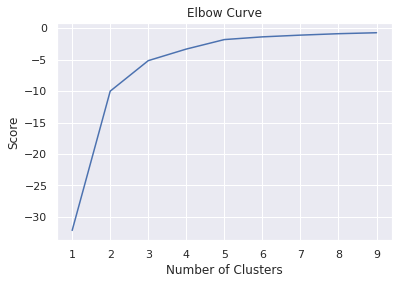

In [257]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = monster_final[['Latitude']]
X_axis = monster_final[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [259]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Type,Latitude,Longitude,cluster_label
0,School,39.065306,-77.070835,2
1,School,39.039616,-77.067036,2
2,School,39.045559,-77.039388,0
3,School,39.089521,-77.048924,0
4,School,39.019444,-77.127721,2
5,School,38.974375,-77.138334,2
6,School,39.087775,-77.161758,2
7,School,39.081604,-77.054724,0
8,School,39.032012,-77.168740,2
9,School,39.178581,-77.066803,2


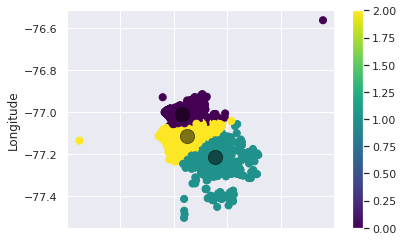

In [260]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## 5. Conclusion